<a href="https://colab.research.google.com/github/carolinart/MIT-Applied-DS-Program/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

In [ ]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations:
The FoodHub dataframe contains 1898 rows and 9 columns in total. More precisely, we have 1898 different orders, which correspond to 1200 different customers.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Check for the full information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Check only for the specific datatypes of each column
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:

We can see that we have 4 integer columns, 4 object (or string) columns and 1 float column, that can be summarized as:


*   Integer columns: order_id, customer_id, food_preparation_time, and delivery time.
*   String columns: restaurant_name, cuisine_type, day_of_the_week, rating
* Float column: cost_of_the_order.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Although the info() function indicated that there were no missing values, we used the isnull() method combined with the sum() method to check more accurately for missing values in each column. This confirmed that there are no missing values in any columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Here a full summary is performed to check for the minimum, average and maximum (among other information) for each column. But as we are interested only in food preparation time, we see that the minimun time it takes for food to be prepared is 20 minutes, on average 27.37 minutes, and the maximum time is 35 minutes, once an order is placed.

 ### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# How many values does the rating column have
df['rating'].describe()

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [ ]:
(df['rating'] == 'Not given').sum()

736

#### Observations:
First, we used describe() function to identify how the not-rated orders were represented in the data. After determining that they were marked as ‘Not given’, we counted their occurrences and found that 736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## 6.1. Restaurant name

In [ ]:
# Let's see how many unique restaurant names there are
print(df['restaurant_name'].nunique())

178


As there are 178 different restaurants, it is difficult to visualize plots for all of them. So, we'll take the top 5 restaurants in terms of number of orders placed.

In [ ]:
# Calculate the count of each category
category_counts = df['restaurant_name'].value_counts()

# Identify the top 5 categories based on count
top_5_categories = category_counts.nlargest(5).index

# Filter the DataFrame to include only rows from the top 5 categories
df_top_5 = df[df['restaurant_name'].isin(top_5_categories)]

In [ ]:
top_5_categories

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object', name='restaurant_name')

<Axes: title={'center': 'Barplot: Restaurant Name'}, xlabel='Restaurant Name', ylabel='count'>

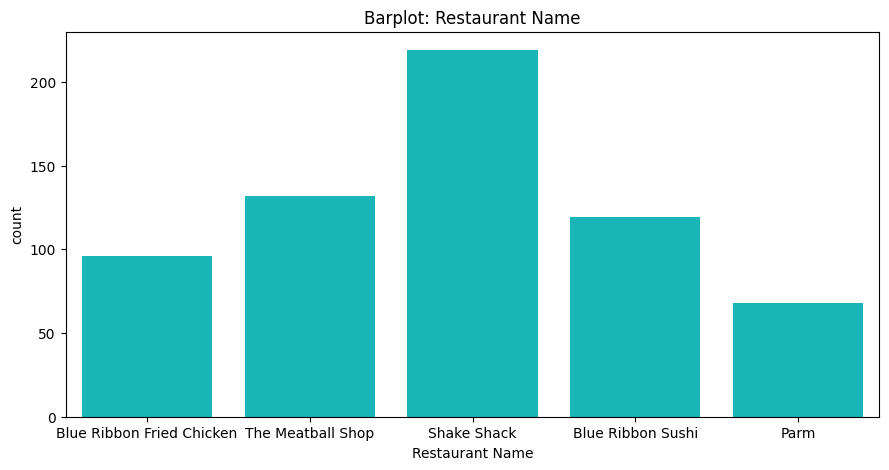

In [ ]:
plt.figure(figsize=(10.5,5))
plt.title('Barplot: Restaurant Name')
plt.xlabel('Restaurant Name')
sns.countplot(data=df_top_5, x='restaurant_name', color = 'darkturquoise')

Among the top 5 restaurants with the highest number of orders placed, Shake Shack appears to be the customers’ favorite on the FoodHub App, followed by The Meatball Shop.

### **6.2. Cost of the Order**



<Axes: title={'center': 'Histogram: Cost'}, xlabel='Cost of the order', ylabel='Frequency'>

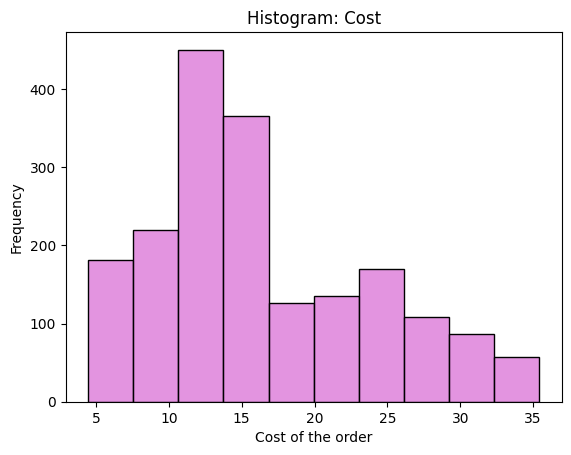

In [ ]:
# HISTOGRAM FOR COST OF THE ORDER
plt.title('Histogram: Cost')
plt.xlabel('Cost of the order')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order',color='orchid', bins = 10)

The histogram suggests that customers commonly place orders that cost around \$10 - \$15. This could indicate a preferred price range for the majority of customers.

We can also say that the highest frequency occurs around the cost of \$12, where more than 400 orders are observed.

6.2.2. Boxplot

<Axes: title={'center': 'Boxplot: Cost'}, xlabel='Cost of the order'>

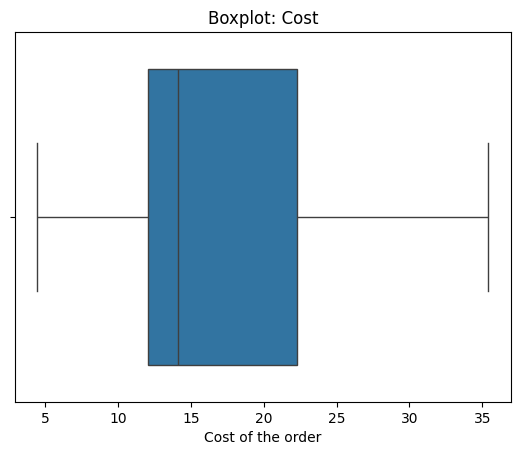

In [ ]:
plt.title('Boxplot: Cost')
plt.xlabel('Cost of the order')
sns.boxplot(data=df, x='cost_of_the_order')

From the boxplot above we can tell there are not missing values, and that the data is slightly positively skewed.

## 6.3. Rating

<Axes: title={'center': 'Barplot: Rating'}, xlabel='Rating', ylabel='count'>

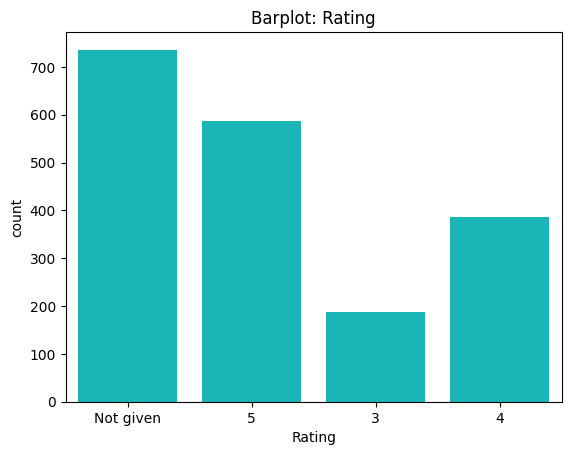

In [ ]:
plt.title('Barplot: Rating')
plt.xlabel('Rating')
sns.countplot(data=df, x='rating',color='darkturquoise')

The bar plot suggests that customers commonly do not rate orders, with over 700 orders left unrated. Among the rated orders, the ratings range from 3 to 5.

## 6.4. Food Preparation Time

6.4.1. Histogram

<Axes: title={'center': 'Histogram: Preparation Time'}, xlabel='Food Preparation Time', ylabel='Frequency'>

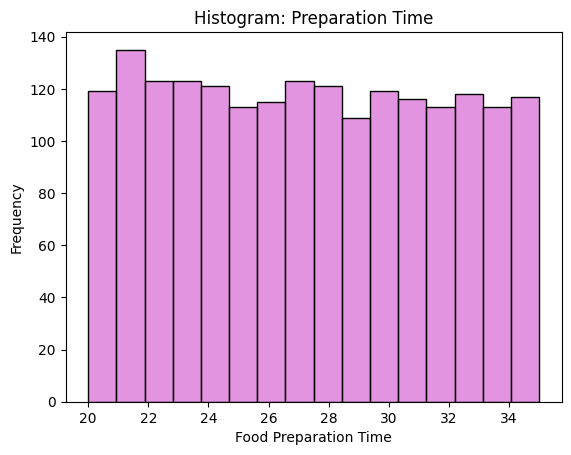

In [ ]:
# HISTOGRAM FOR FOOD PREPARATION TIME
plt.title('Histogram: Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time',color='orchid', bins = 16)

The preparation time distribution appears to be uniform, with restaurants taking between 20 and 34 minutes to complete the preparation.

6.4.2. Boxplot

<Axes: title={'center': 'Boxplot: Preparation Time'}, xlabel='Preparation Time'>

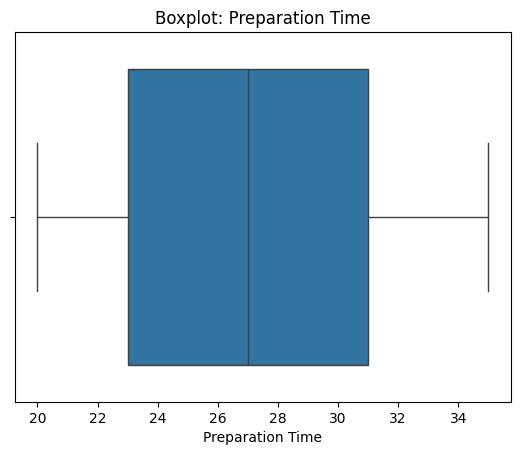

In [ ]:
plt.title('Boxplot: Preparation Time')
plt.xlabel('Preparation Time')
sns.boxplot(data=df, x='food_preparation_time')

The above boxplot confirms that the data is not skewed and that is mostly uniform, since the mean and the median appear to be very close.

## 6.5. Delivery Time

6.5.1. Histogram

<Axes: title={'center': 'Histogram: Delivery Time'}, xlabel='Delivery Time', ylabel='Frequency'>

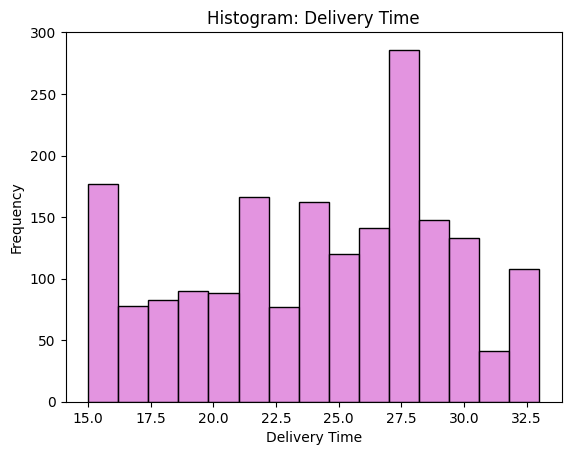

In [ ]:
# HISTOGRAM FOR DELIVERY TIME
plt.title('Histogram: Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time',color='orchid', bins = 15)

It takes between 15 minutes to 32.5 minutes to deliver an order, with the most common delivery time being 27.5 minutes.

6.5.2. Boxplot

<Axes: title={'center': 'Boxplot: Delivery Time'}, xlabel='Delivery Time'>

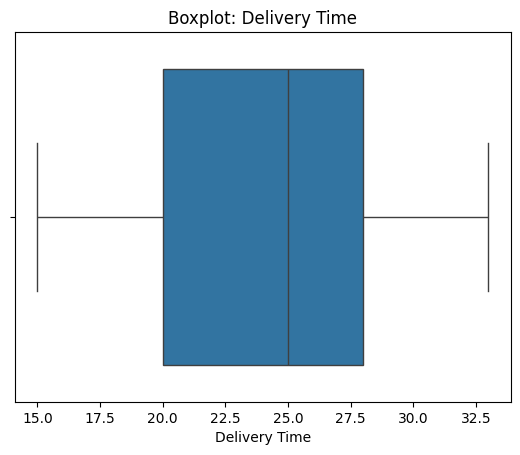

In [ ]:
plt.title('Boxplot: Delivery Time')
plt.xlabel('Delivery Time')
sns.boxplot(data=df, x='delivery_time')

Delivery time data is slightly negatively skewed, and has no missing values.

## 6.6. Cuisine Type

In [ ]:
# Let's see how many unique restaurant names there are
print(df['cuisine_type'].nunique())

14


<Axes: xlabel='cuisine_type', ylabel='count'>

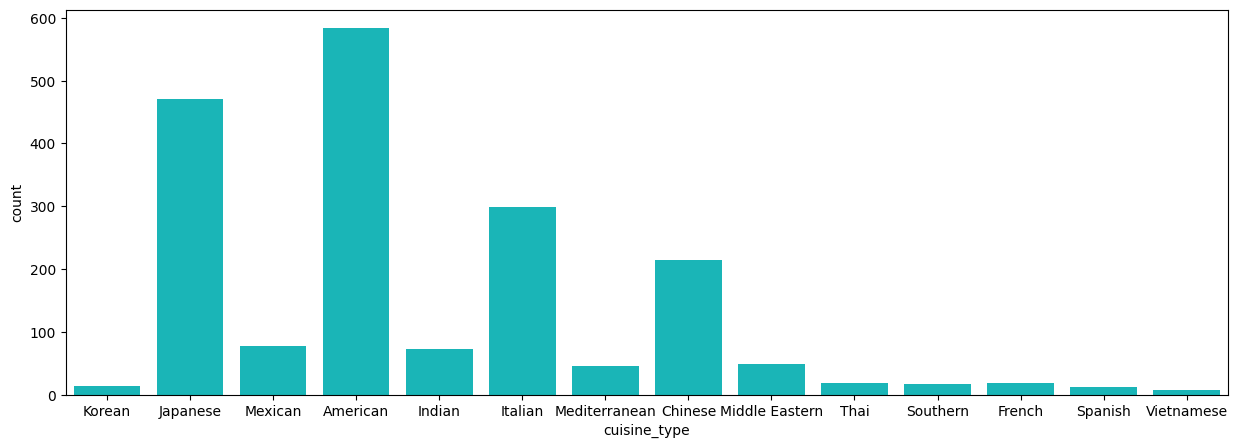

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', color = 'darkturquoise')

The most popular cuisine type among the app's customers is American, with almost 600 orders, which is evident given that the top restaurant is Shake Shack. The second most popular cuisine type is japanese, with approximately 500 orders.

## 6.7. Day of the Week

<Axes: xlabel='day_of_the_week', ylabel='count'>

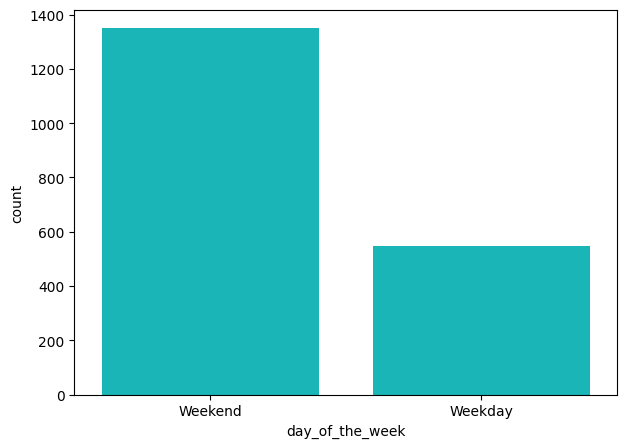

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='day_of_the_week', color = 'darkturquoise')

As seen from the countplot, weekends are the days in which customers place more orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Calculate the count of each category
category_counts = df['restaurant_name'].value_counts()

# Identify the top 5 categories based on count
top_5_categories = category_counts.nlargest(5).index

print(top_5_categories)

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object', name='restaurant_name')


#### Observations:
The top 5 restaurants in order from larger to lower number of orders are:


1.   Shake Shack
2.   The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Calculate the count of each category
category_counts = df.groupby('day_of_the_week')['cuisine_type'].value_counts()

print(category_counts)

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
Both on weekdays and on weekends, the most popular cuisine type is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
total_orders = df.shape[0]
cost_more_20 = (df['cost_of_the_order'] > 20).sum()
print(cost_more_20/total_orders)

0.2924130663856691


#### Observations:
29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time for an order is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
category_counts = df['customer_id'].value_counts()

# Identify the top 3 most frequent customers
top_3 = category_counts.nlargest(3)

print(top_3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The top 3 customers and their number of orders are:



1.   52832, with 13 orders in total.
2.   47440, with 10 orders.
3.  83287, with 9 orders.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


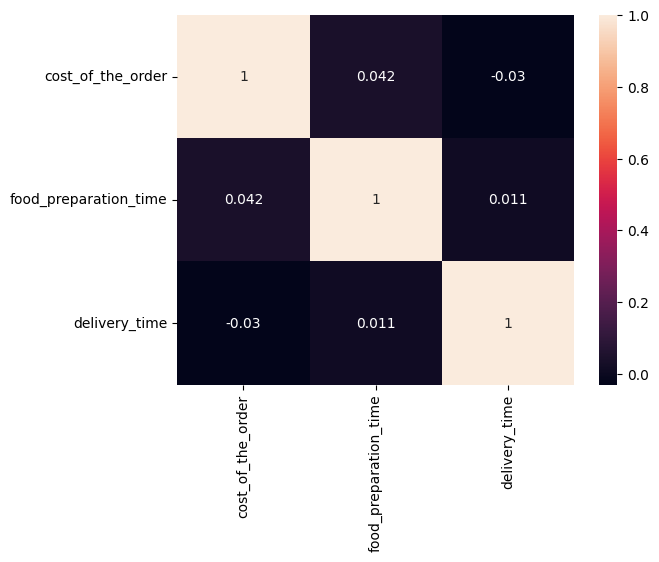

In [ ]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot = True);

The weak correlation coefficients (close to 0) between all pairs of variables suggest that there is little to no linear relationship between the cost of the order, the food preparation time, and the delivery time.

Text(32.41936728395059, 0.5, 'Cuisine Type')

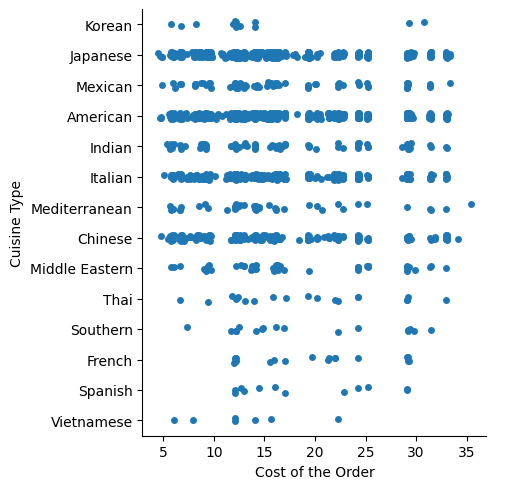

In [ ]:
sns.catplot(data=df, x='cost_of_the_order', y='cuisine_type')
plt.xlabel('Cost of the Order')
plt.ylabel('Cuisine Type')

There is a concentration of lower-cost orders in some cuisines, like Japanese and American. While	the diverse spread in cuisines like Mediterranean and Chinese indicates that these cuisines may have a broader range of items spanning from inexpensive to expensive, specially, Mediterranean cuisine appears to have the most expensive items.

Text(31.547145061728386, 0.5, 'Day of Week')

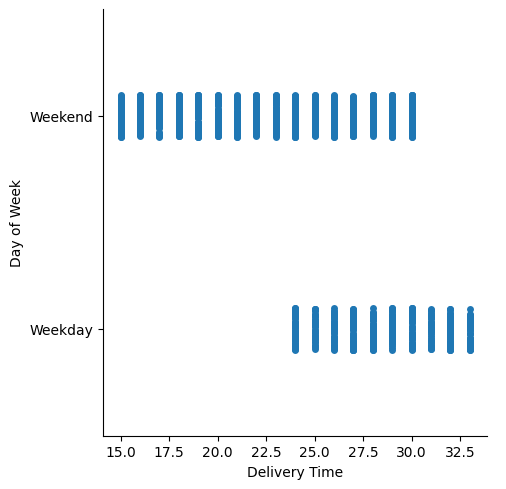

In [ ]:
sns.catplot(data=df, x='delivery_time', y='day_of_the_week')
plt.xlabel('Delivery Time')
plt.ylabel('Day of Week')

The plot indicates a significant difference in delivery times between weekdays and weekends, with weekdays experiencing longer delivery times.

Text(31.547145061728386, 0.5, 'Day of Week')

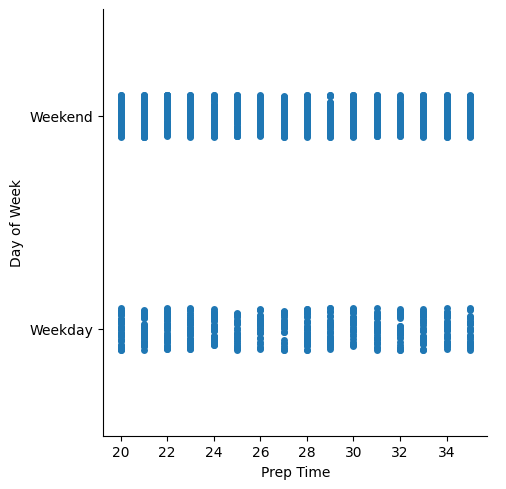

In [ ]:
sns.catplot(data=df, x='food_preparation_time', y='day_of_the_week')
plt.xlabel('Prep Time')
plt.ylabel('Day of Week')

There is not a difference between weekdays and weekend food preparation times.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert the 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN ratings (originally 'not given')
df = df.dropna(subset=['rating'])

# Group by restaurant_name and calculate rating count and average rating
rating_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

eligible_restaurants = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)]

print(eligible_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
The restaurants that fulfill the criteria to be elected for the promotional offer are:

*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate the commission for each order
df['commission'] = 0  # Initialize the commission column with 0

# Apply the 25% commission rate for orders costing more than $20
df.loc[df['cost_of_the_order'] > 20, 'commission'] = df['cost_of_the_order'] * 0.25

# Apply the 15% commission rate for orders costing more than $5 and up to $20
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'commission'] = df['cost_of_the_order'] * 0.15

# Calculate the net revenue
net_revenue = df['commission'].sum()

print(net_revenue)

3865.572


#### Observations:
The net revenue generated by the company across all orders is: $3865.57

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
num_orders_over_60 = df[df['total_time'] > 60].shape[0]

total_orders = df.shape[0]

percentage_over_60 = (num_orders_over_60 / total_orders) * 100

print(percentage_over_60)

10.240963855421686


#### Observations:
The percentage of orders that take more than 60 minutes to get delivered is: 10.24%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time)

day_of_the_week
Weekday    28.305882
Weekend    22.436740
Name: delivery_time, dtype: float64


#### Observations:
The mean delivery time for weekdays is 28.3 minutes, and the mean delivery time for weekends is 22.4 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Japanese and American cuisines are the most popular among customers in terms of number of orders, and at the same time are apparently the cheaper options.
* People tend to order food more frequently during the weekends.
* Delivery times are higher on weekdays.
* Most orders are left unrated by the customers.

### Recommendations:

*  To incentivize customer ratings, I suggest that the Company develop a loyalty program or run a campaign offering prizes for each rating. Alternatively, they could create a competition where the top 3 customers who rate the most orders win a prize.
* Since American and Japanese cuisines are clearly capturing customers' attention, other cuisines could benefit from offering promotions to attract more interest.
* Restaurants and delivery services might consider increasing staff or optimizing delivery routes on weekdays to manage the longer delivery times.

---